In [1]:
import numpy as np
import cv2

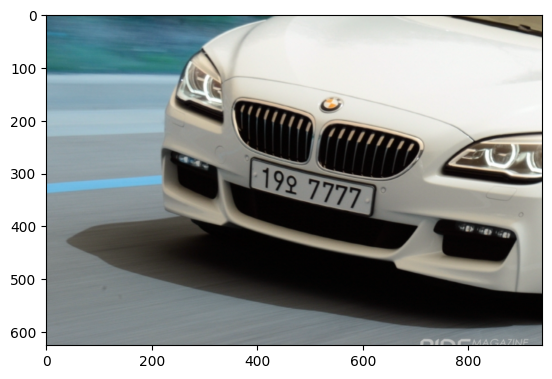

In [4]:
image = cv2.imread("1.jpg", cv2.IMREAD_COLOR)
if image is None: raise Exception('not found picture !')

#pts1 = np.float32([(80,40), (315,133), (75, 300), (335, 400)])
#pts2 = np.float32([(50, 60), (340, 60), (50,320), (340, 320)])

pts1 = np.float32([(240,250), (230,700), (240, 300), (335, 700)])
pts2 = np.float32([(200, 270), (250, 650), (230, 320), (340, 700)])

rows, cols = image.shape[:2]

#---① 원근 변환 전 후 4개 좌표
pts1 = np.float32([[0,0], [0,rows], [cols, 0], [cols,rows]])
pts2 = np.float32([[100,50], [10,rows-50], [cols-100, 50], [cols-10,rows-50]])

mtrx = cv2.getPerspectiveTransform(pts2, pts1)

#perspect_mat = cv2.getPerspectiveTransform(pts1, pts2)
dst = cv2.warpPerspective(image, mtrx, (cols, rows))
#dst = cv2.warpPerspective(image, perspect_mat, image.shape[1::-1], cv2.INTER_CUBIC)

import matplotlib.pyplot as plt

plt.imshow(dst)


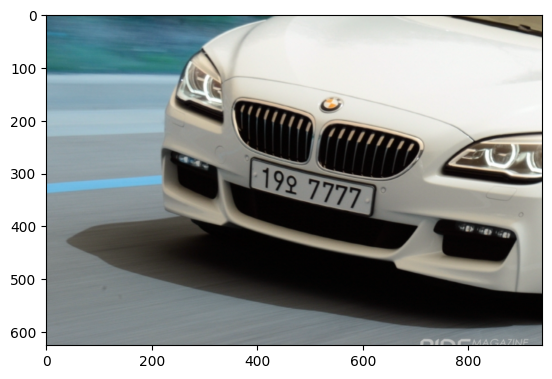

In [5]:
plt.imshow(dst)

In [1]:
import cv2
import numpy as np

file_name = "fish.jpg"
img = cv2.imread(file_name)
rows, cols = img.shape[:2]

#---① 원근 변환 전 후 4개 좌표
pts1 = np.float32([[0,0], [0,rows], [cols, 0], [cols,rows]])
pts2 = np.float32([[100,50], [10,rows-50], [cols-100, 50], [cols-10,rows-50]])

#---② 변환 전 좌표를 원본 이미지에 표시
cv2.circle(img, (0,0), 10, (255,0,0), -1)
cv2.circle(img, (0,rows), 10, (0,255,0), -1)
cv2.circle(img, (cols,0), 10, (0,0,255), -1)
cv2.circle(img, (cols,rows), 10, (0,255,255), -1)

#---③ 원근 변환 행렬 계산
mtrx = cv2.getPerspectiveTransform(pts1, pts2)

mtrx2 = cv2.getPerspectiveTransform(pts2, pts1)
#---④ 원근 변환 적용
dst = cv2.warpPerspective(img, mtrx, (cols, rows))
dst2 = cv2.warpPerspective(dst, mtrx2, (cols, rows))
cv2.imshow("origin", img)
cv2.imshow('perspective', dst2)
cv2.waitKey(0)
cv2.destroyAllWindows()
            

In [10]:
pt0 = np.float32([250, 380])
pt1 = np.float32([300, 600])

dx, dy = np.subtract(pt1, pt0)
print(dx)

50.0


In [11]:
angle = cv2.fastAtan2(dy, dx)

In [13]:
rot_mat = cv2.getRotationMatrix2D(pt0, angle, 1)

In [15]:
size = image.shape[1::-1]
corr_image = cv2.warpAffine(image, rot_mat, size, cv2.INTER_CUBIC)
cv2.imshow("per", corr_image)